https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 5)

In [14]:
weather = pd.read_csv(r"C:\Users\vnlvi\Downloads\Projetos\DataCamp\Estudos_Python_Ciencia_de_Dados\04_Introduction_to_Data_Visualization_with_Matplotlib\datasets\seattle_weather.csv", index_col='DATE')
austin_weather = pd.read_csv(r"C:\Users\vnlvi\Downloads\Projetos\DataCamp\Estudos_Python_Ciencia_de_Dados\04_Introduction_to_Data_Visualization_with_Matplotlib\datasets\austin_weather.csv", index_col='DATE')
# Some pre-processing on the weather datasets, including adding a month column
seattle_weather = weather[weather["STATION"] == "USW00094290"] 
month = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"] 
seattle_weather.loc[:,"MONTH"] = month 
austin_weather.loc[:,"MONTH"] = month

c:\Users\vnlvi\Anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


## Switching between styles
Selecting a style to use affects all of the visualizations that are created after this style is selected.

- Select the *'ggplot'* style, create a new Figure called fig, and a new Axes object called ax with plt.subplots.

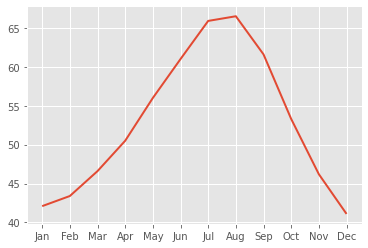

In [15]:
# Use the "ggplot" style and create new Figure/Axes
plt.style.use("ggplot")
fig, ax = plt.subplots()
ax.plot(seattle_weather["MONTH"], seattle_weather["MLY-TAVG-NORMAL"])
plt.show()

- Select the *'Solarize_Light2'* style, create a new Figure called fig, and a new Axes object called ax with plt.subplots

C:\Users\vnlvi\AppData\Local\Temp/ipykernel_12192/4116939723.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.show()


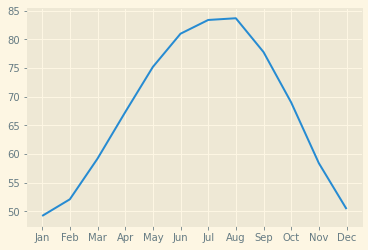

In [12]:
# Use the "Solarize_Light2" style and create new Figure/Axes
plt.style.use("Solarize_Light2")
plt, ax = plt.subplots()
ax.plot(austin_weather["MONTH"], austin_weather["MLY-TAVG-NORMAL"])

## Saving your visualizations
### Saving a file several times

In [16]:
# Show the figure
plt.show()

# Save as a PNG file
fig.savefig('my_figure.png')

# Save as a PNG file with 300 dpi
fig.savefig('my_figure_300dpi.png', dpi=300)

## Save a figure with different sizes

In [18]:
# Set the figure size as width of 3 inches and height of 5 inches and save it as 'figure_3_5.png' with default resolution.
fig.set_size_inches([3, 5])
fig.savefig('figure_3_5.png')

# Set the figure size to width of 5 inches and height of 3 inches and save it as 'figure_5_3.png' with default settings.
fig.set_size_inches([5, 3])
fig.savefig('figure_5_3.png')

## Automating figures from data
- Why automate?
    - Ease and speed
    - Flexibility
    - Robustness
    - Reproducibility

### Unique values of a column
One of the main strengths of Matplotlib is that it can be automated to adapt to the data that it receives as input. For example, if you receive data that has an unknown number of categories, you can still create a bar plot that has bars for each category.

In this exercise and the next, you will be visualizing the weight of medalis in the 2016 summer Olympic Games again, from a dataset that has some unknown number of branches of sports in it. This will be loaded into memory as a Pandas DataFrame object called `summer_2016_medals`, which has a column called `"Sport"` that tells you to which branch of sport each row corresponds. There is also a `"Weight"` column that tells you the weight of each athlete.

In [23]:
summer_2016_medals = pd.read_csv(r'C:\Users\vnlvi\Downloads\Projetos\DataCamp\Estudos_Python_Ciencia_de_Dados\04_Introduction_to_Data_Visualization_with_Matplotlib\datasets\summer2016.csv',index_col=0)

In [24]:
# Extract the "Sport" column
sports_column = summer_2016_medals['Sport']

# Find the unique values of the "Sport" column
sports = sports_column.unique()

# Print out the unique sports values
print(sports)

['Rowing' 'Taekwondo' 'Handball' 'Wrestling' 'Gymnastics' 'Swimming'
 'Basketball' 'Boxing' 'Volleyball' 'Athletics' 'Rugby Sevens' 'Judo'
 'Rhythmic Gymnastics' 'Weightlifting' 'Equestrianism' 'Badminton'
 'Water Polo' 'Football' 'Fencing' 'Shooting' 'Sailing' 'Beach Volleyball'
 'Canoeing' 'Hockey' 'Cycling' 'Tennis' 'Diving' 'Table Tennis'
 'Triathlon' 'Archery' 'Synchronized Swimming' 'Modern Pentathlon'
 'Trampolining' 'Golf']


### Automate your visualization
One of the main strengths of Matplotlib is that it can be automated to adapt to the data that it receives as input. For example, if you receive data that has an unknown number of categories, you can still create a bar plot that has bars for each category.

This is what you will do in this exercise. You will be visualizing data about medal winners in the 2016 summer Olympic Games again, but this time you will have a dataset that has some unknown number of branches of sports in it. This will be loaded into memory as a Pandas DataFrame object called `summer_2016_medals`, which has a column called `"Sport"` that tells you to which branch of sport each row corresponds. There is also a `"Weight"` column that tells you the weight of each athlete.

C:\Users\vnlvi\AppData\Local\Temp/ipykernel_12192/2868552879.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sports, rotation=90);


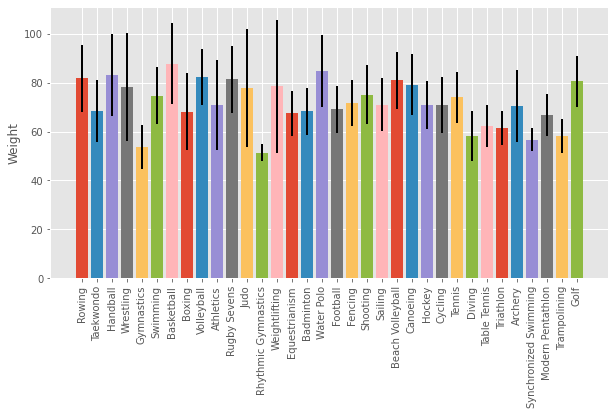

In [28]:
fig, ax = plt.subplots()

# Loop over the different sports branches
for sport in sports:
  # Extract the rows only for this sport
  sport_df = summer_2016_medals[summer_2016_medals["Sport"] == sport]
  # Add a bar for the "Weight" mean with std y error bar
  ax.bar(sport, sport_df["Weight"].mean(), yerr=sport_df["Weight"].std());

ax.set_ylabel("Weight");
ax.set_xticklabels(sports, rotation=90);

# Save the figure to file
fig.savefig("sports_weights.png")